## Given data about telecom customer telecom interactions, use various methods of clustering to cluster into groups. This can be used to do cluster profiling and understand their behaviour segmented and better 

In [1]:
import os
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt

In [2]:
telco = pd.read_csv("telco.csv")

In [3]:
telco.sample(10)

,Calls,Intern,Text,Data,Age
382,0.99,0.22,21.27,0.23,61
331,1.17,0.23,17.62,0.22,61
308,5.42,1.00,17.21,2.36,51
245,1.56,0.09,532.54,2.85,16
205,1.65,0.09,560.99,2.98,16
2,3.54,0.26,289.79,1.99,34
591,1.47,0.09,570.68,3.17,14
222,2.22,0.09,22.18,0.58,40
345,4.28,1.16,18.78,1.84,49
37,1.10,0.20,23.65,0.23,66


In [4]:
#scaling data
# apply to each column
telco_scaled = telco.apply(lambda x: (x - np.mean(x))/ np.std(x))

In [6]:
telco_scaled.head(10)

,Calls,Intern,Text,Data,Age
0,-0.996125,-0.569290,-0.940982,-1.299162,1.372936
1,-1.022513,-0.489795,-0.969806,-1.262765,1.002273
2,0.600387,-0.383802,0.303060,0.018380,-0.233271
3,-1.015916,-0.516293,-0.963302,-1.277324,1.434713
4,-1.048902,-0.436798,-0.957780,-1.284603,1.125827
5,1.952805,1.259094,-0.962927,0.040218,0.199170
6,-0.949944,-0.569290,-0.968963,-1.255486,2.052484
7,0.290321,-0.171815,0.629196,0.069335,-0.480379
8,1.787876,1.550575,0.329638,-0.724102,0.199170
9,-0.131897,-0.834273,-0.970695,-1.095343,-0.295048


In [7]:
telco_scaled.describe()

,Calls,Intern,Text,Data,Age
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.989964e-15,-2.852385e-15,1.069034e-15,-1.973387e-15,-2.446932e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.174248e+00,-8.342729e-01,-9.733149e-01,-1.306441e+00,-1.592368e+00
25%,-7.520297e-01,-7.812762e-01,-9.557213e-01,-1.051668e+00,-8.510422e-01
50%,-3.891861e-01,-4.897948e-01,-1.614142e-01,1.110083e-02,-1.714934e-01
75%,5.690510e-01,1.020609e+00,1.050073e+00,6.826104e-01,8.169412e-01
max,2.223288e+00,2.107040e+00,1.749616e+00,2.056566e+00,2.114262e+00


## Hierarchical clustering
### Agglomerative : n clusters -> 1 cluster
### Divisive: 1 cluster -> n clusters

In [8]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage


In [10]:
# perform linkage for clustering
Z = linkage(telco_scaled, "complete")

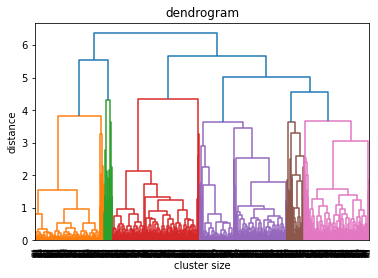

In [11]:
# PLOT DENDOGRAM
# left rotation -> vertical
# The vertical axis is labelled distance and refers to a distance measure between compounds or compound clusters

dendrogram(Z, leaf_rotation = 90, leaf_font_size = 5.)
plt.title("dendrogram")
plt.xlabel("cluster size")
plt.ylabel("distance")
plt.show()

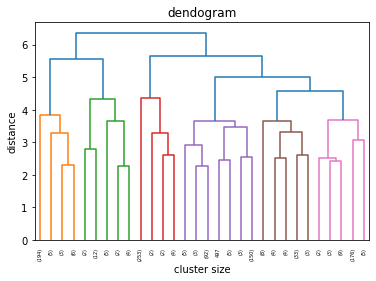

In [12]:
# last p clusters only
dendrogram(Z, truncate_mode = 'lastp', p = 30, leaf_rotation = 90, leaf_font_size = 5.)
plt.title("dendogram")
plt.xlabel("cluster size")
plt.ylabel("distance")
plt.show()


In [13]:
# do clustering

import sklearn
from sklearn.cluster import AgglomerativeClustering


In [14]:
hclust = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [15]:
hclust.fit(telco_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [16]:
# group after clustering

telco['Groups'] = hclust.labels_


In [17]:
telco.head(10)

,Calls,Intern,Text,Data,Age,Groups
0,1.12,0.19,23.92,0.18,60,3
1,1.08,0.22,17.76,0.23,54,3
2,3.54,0.26,289.79,1.99,34,4
3,1.09,0.21,19.15,0.21,61,3
4,1.04,0.24,20.33,0.20,56,3
5,5.59,0.88,19.23,2.02,41,0
6,1.19,0.19,17.94,0.24,71,3
7,3.07,0.34,359.49,2.06,30,4
8,5.34,0.99,295.47,0.97,41,0
9,2.43,0.09,17.57,0.46,33,4


In [18]:
#cluster profiling

telco.groupby(['Groups']).median()

,Calls,Intern,Text,Data,Age
Groups,,,,,
0,4.900,1.02,21.930,2.03,44
1,5.020,0.45,391.430,1.51,50
2,1.700,0.10,509.930,3.71,20
3,1.025,0.21,20.885,0.21,61
4,2.800,0.27,281.190,1.82,32


## K means

In [19]:
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion
from sklearn.cluster import KMeans


In [20]:
# n_init: kmeans ++ is used by default and Number of time the k-means algorithm will be run with different
# centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

km = KMeans(n_clusters = 5, n_init = 40)

In [21]:
km.fit(telco_scaled)

KMeans(n_clusters=5, n_init=40)

In [22]:
telco['Groups'] = km.labels_

In [23]:
# cluster profiling
telco.groupby(['Groups']).median()

,Calls,Intern,Text,Data,Age
Groups,,,,,
0,5.090,1.00,20.91,2.070,46
1,1.690,0.10,510.35,3.715,20
2,1.010,0.20,20.66,0.210,61
3,2.965,0.33,309.14,1.965,32
4,2.320,0.10,20.51,0.530,35


In [24]:
# measure inertia which is the sum of intra cluster distances
km.inertia_

785.930877506844

In [27]:
# Draw scree plot of inertias
inertias = []

for k in range(2,13):
    km = KMeans(n_clusters = k, n_init = 40)
    inertia = km.fit(telco_scaled).inertia_
    inertias.append(inertia)


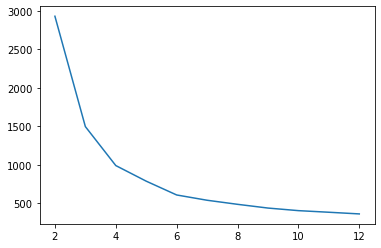

In [28]:
plt.plot(range(2,13), inertias)
plt.show()


### From above scree plot we can see that elbow is at around n=5 and after that there's minimal change in inertia  so that'll be ideal

In [29]:
#TODO: silhoutte score accuracy scores for clustering algos